# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

Assignment: Determine whether or not an email is spam or ham based on previous emails. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

The emails were provided to us in a large zip folder and were labeled with either spam or ham.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import glob

In [3]:
data_path = "data"

df = pd.DataFrame(columns=["name", "text"])

full_paths = glob.glob(os.path.join(data_path, "*"))

In [4]:
all_names = []
all_messages = []
for file_path in full_paths:
    try:
        with open(file_path, "r") as f:
            txt = f.read()
        all_names.append(os.path.basename(file_path))
        all_messages.append(txt)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

In [5]:
df["text"] = all_messages
df["name"] = all_names

In [6]:
df.head()

,name,text
0,6-14msg3.txt,Subject: wkshp : * early * - e ( = ) uralic in...
1,6-110msg1.txt,Subject: job announcement - academium sinica\n...
2,9-63msg1.txt,Subject: knowledge language bibliography\n\nas...
3,spmsga95.txt,Subject: service update\n\ndue significant rap...
4,6-97msg1.txt,Subject: job announcement\n\njob announcement ...


In [7]:
spam_df = df[df['name'].str.startswith('spm')]
spam_df = spam_df.copy()
ham_df = df[~df.apply(tuple,1).isin(spam_df.apply(tuple,1))]
ham_df = ham_df.copy()

In [8]:
print(spam_df.head())
print(ham_df.head())

             name                                               text
3    spmsga95.txt  Subject: service update\n\ndue significant rap...
6    spmsgb16.txt  Subject: season greeting santa !\n\nsanta onli...
9   spmsga161.txt  Subject: futuresignal\n\nmessage send complian...
10  spmsgc135.txt  Subject: did work ? - calsvxtn\n\nhello thank ...
13  spmsga130.txt  Subject: zero down internet opportunity !\n\n$...
            name                                               text
0   6-14msg3.txt  Subject: wkshp : * early * - e ( = ) uralic in...
1  6-110msg1.txt  Subject: job announcement - academium sinica\n...
2   9-63msg1.txt  Subject: knowledge language bibliography\n\nas...
4   6-97msg1.txt  Subject: job announcement\n\njob announcement ...
5  8-887msg1.txt  Subject: hypermedium den geisteswissenschaften...


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Some things I want to look at:
- tone indicators
- capitalization patterns (spam will probably have more capitals to try to convince u)
- word frequency
- sender address (no reply or smth like that is sketchy while edu is good)

In [9]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [10]:
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS

spam_text = ' '.join(spam_df['text'].astype(str).tolist())

spam_text = re.sub(r'[^A-Za-z\s]', '', spam_text)

spam_text = spam_text.lower()

stopwords = set(STOPWORDS)
spam_text = ' '.join(word for word in spam_text.split() if word not in stopwords and len(word) > 2)

sp_cleaned_text_df = spam_df["text"].apply(lambda x: re.sub(r'[^A-Za-z\s]', '',x).lower())

spam_df["clean"] = sp_cleaned_text_df.apply(
                        lambda x: [word for word in x.split() if word not in stopwords]
                    )

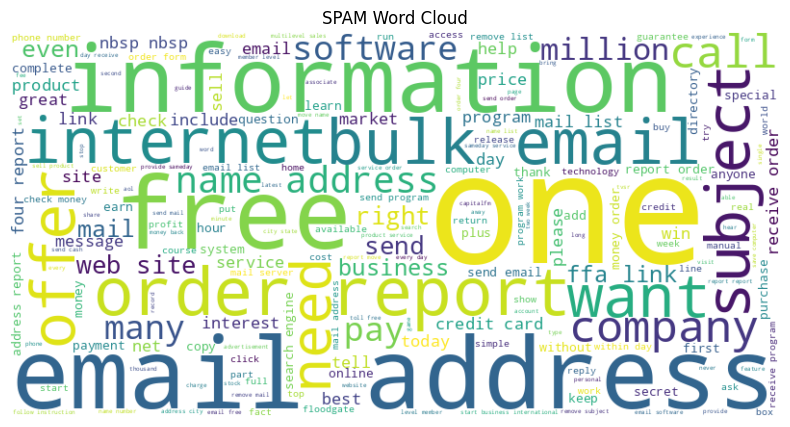

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("SPAM Word Cloud")
plt.show()

In [12]:
import collections

spam_lst = spam_text.split(" ")
spam_counter = collections.Counter(spam_lst)
print(spam_counter.most_common(10))

total = len(spam_lst)
for item, count in spam_counter.most_common(10):
    percentage = (count / total) * 100
    print(f"{item}: {percentage:.2f}%")

[('email', 1518), ('order', 1284), ('report', 1264), ('mail', 1044), ('address', 1037), ('send', 945), ('program', 933), ('free', 819), ('list', 799), ('receive', 796)]
email: 1.42%
order: 1.20%
report: 1.18%
mail: 0.97%
address: 0.97%
send: 0.88%
program: 0.87%
free: 0.76%
list: 0.75%
receive: 0.74%


In [13]:
ham_text = ' '.join(ham_df['text'].astype(str).tolist())

ham_text = re.sub(r'[^A-Za-z\s]', '', ham_text)

ham_text = ham_text.lower()

ham_text = ' '.join(word for word in ham_text.split() if word not in stopwords and len(word) > 2)

h_cleaned_text_df = ham_df["text"].apply(lambda x: re.sub(r'[^A-Za-z\s]', '',x).lower())

ham_df["clean"] = h_cleaned_text_df.apply(
                        lambda x: [word for word in x.split() if word not in stopwords]
                    )

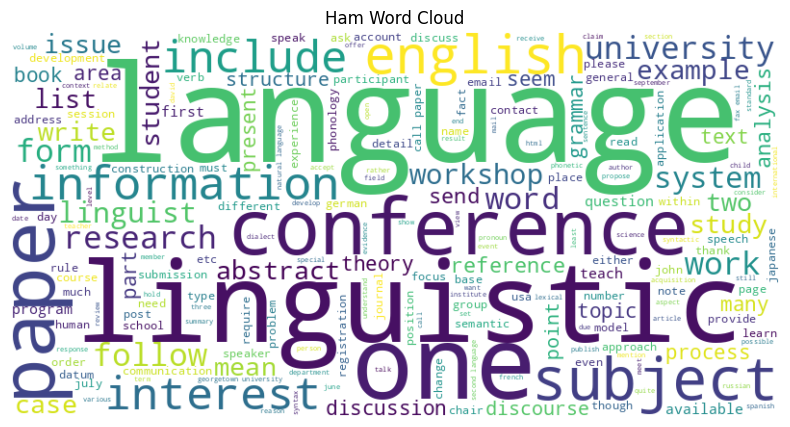

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Ham Word Cloud")
plt.show()

In [15]:
ham_lst = ham_text.split(" ")
ham_counter = collections.Counter(ham_lst)
print(ham_counter.most_common(10))

total = len(ham_lst)
for item, count in ham_counter.most_common(10):
    percentage = (count / total) * 100
    print(f"{item}: {percentage:.2f}%")

[('language', 1578), ('university', 1142), ('linguistic', 677), ('subject', 610), ('conference', 568), ('one', 457), ('edu', 456), ('information', 453), ('english', 422), ('email', 362)]
language: 1.35%
university: 0.98%
linguistic: 0.58%
subject: 0.52%
conference: 0.49%
one: 0.39%
edu: 0.39%
information: 0.39%
english: 0.36%
email: 0.31%


The most common words in the ham are clearly academic terms, which suggests this person is a professor.

In [16]:
spam_df['text_lengths'] = spam_df['text'].apply(
    lambda x: [len(part) for i, part in enumerate(x.split('\n')) if i not in (1, 3)]
)

print(spam_df.head())
sp_lengths_df = pd.DataFrame(spam_df['text_lengths'].tolist())
print("Median length for subject:", sp_lengths_df[0].median())
print("Median length for body text:", sp_lengths_df[1].median())
print("Median length for total:", sp_lengths_df[1].median() + sp_lengths_df[0].median())

             name                                               text  \
3    spmsga95.txt  Subject: service update\n\ndue significant rap...   
6    spmsgb16.txt  Subject: season greeting santa !\n\nsanta onli...   
9   spmsga161.txt  Subject: futuresignal\n\nmessage send complian...   
10  spmsgc135.txt  Subject: did work ? - calsvxtn\n\nhello thank ...   
13  spmsga130.txt  Subject: zero down internet opportunity !\n\n$...   

                                                clean text_lengths  
3   [subject, service, update, due, significant, r...    [23, 311]  
6   [subject, season, greeting, santa, santa, onli...    [32, 141]  
9   [subject, futuresignal, message, send, complia...   [21, 1765]  
10  [subject, work, calsvxtn, hello, thank, stop, ...    [30, 133]  
13  [subject, zero, internet, opportunity, interne...    [41, 152]  
Median length for subject: 31.0
Median length for body text: 1337.0
Median length for total: 1368.0


In [17]:
ham_df['text_lengths'] = ham_df['text'].apply(
    lambda x: [len(part) for i, part in enumerate(x.split('\n')) if i not in (1, 3)]
)

print(ham_df.head())
h_lengths_df = pd.DataFrame(ham_df['text_lengths'].tolist())
print("Median length for subject:", h_lengths_df[0].median())
print("Median length for body text:", h_lengths_df[1].median())
print("Median length for total:", h_lengths_df[1].median() + h_lengths_df[0].median())

            name                                               text  \
0   6-14msg3.txt  Subject: wkshp : * early * - e ( = ) uralic in...   
1  6-110msg1.txt  Subject: job announcement - academium sinica\n...   
2   9-63msg1.txt  Subject: knowledge language bibliography\n\nas...   
4   6-97msg1.txt  Subject: job announcement\n\njob announcement ...   
5  8-887msg1.txt  Subject: hypermedium den geisteswissenschaften...   

                                               clean text_lengths  
0  [subject, wkshp, early, e, uralic, interaction...   [55, 1917]  
1  [subject, job, announcement, academium, sinica...   [44, 1339]  
2  [subject, knowledge, language, bibliography, a...    [40, 953]  
4  [subject, job, announcement, job, announcement...   [25, 1218]  
5  [subject, hypermedium, den, geisteswissenschaf...   [46, 1136]  
Median length for subject: 35.0
Median length for body text: 1376.0
Median length for total: 1411.0


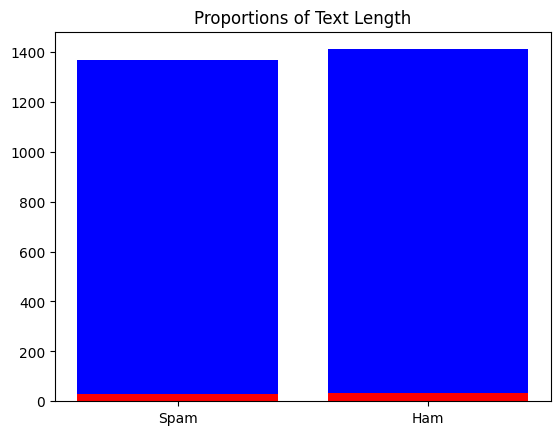

In [18]:
x = ["Spam", "Ham"]
y1 = [sp_lengths_df[0].median(), h_lengths_df[0].median()]
y2 = [sp_lengths_df[1].median(), h_lengths_df[1].median()]

plt.bar(x, y1, color='r', label="Subject Length")
plt.bar(x, y2, bottom=y1, color='b', label="Body Length")
plt.title("Proportions of Text Length")
plt.show()

There are no super significant differences between subject and body text length between the spam and ham, besides the ham being a little more in subject and less in body. Even when looking at median (resistant to any outliers), the counts are very similar. 

In [19]:
spam_df.head(10)

,name,text,clean,text_lengths
3,spmsga95.txt,Subject: service update\n\ndue significant rap...,"[subject, service, update, due, significant, r...","[23, 311]"
6,spmsgb16.txt,Subject: season greeting santa !\n\nsanta onli...,"[subject, season, greeting, santa, santa, onli...","[32, 141]"
9,spmsga161.txt,Subject: futuresignal\n\nmessage send complian...,"[subject, futuresignal, message, send, complia...","[21, 1765]"
10,spmsgc135.txt,Subject: did work ? - calsvxtn\n\nhello thank ...,"[subject, work, calsvxtn, hello, thank, stop, ...","[30, 133]"
13,spmsga130.txt,Subject: zero down internet opportunity !\n\n$...,"[subject, zero, internet, opportunity, interne...","[41, 152]"
14,spmsgc119.txt,Subject: advertise million million free ! ! ! ...,"[subject, advertise, million, million, free, k...","[54, 3393]"
15,spmsga65.txt,Subject: cable decsrambler $ 6 . 99 !\n\nreall...,"[subject, cable, decsrambler, really, cool, pr...","[37, 1509]"
18,spmsgc133.txt,Subject: sorry delay - fqtfsqvb\n\nhello thank...,"[subject, sorry, delay, fqtfsqvb, hello, thank...","[31, 133]"
20,spmsgb77.txt,Subject: here send own bulk email\n\nwebsite t...,"[subject, send, bulk, email, website, teach, b...","[33, 1537]"
21,spmsgc68.txt,Subject: sunshine !\n\nvacation ! most exotic ...,"[subject, sunshine, vacation, exotic, place, e...","[19, 490]"


In [20]:
ham_df.head(10)

,name,text,clean,text_lengths
0,6-14msg3.txt,Subject: wkshp : * early * - e ( = ) uralic in...,"[subject, wkshp, early, e, uralic, interaction...","[55, 1917]"
1,6-110msg1.txt,Subject: job announcement - academium sinica\n...,"[subject, job, announcement, academium, sinica...","[44, 1339]"
2,9-63msg1.txt,Subject: knowledge language bibliography\n\nas...,"[subject, knowledge, language, bibliography, a...","[40, 953]"
4,6-97msg1.txt,Subject: job announcement\n\njob announcement ...,"[subject, job, announcement, job, announcement...","[25, 1218]"
5,8-887msg1.txt,Subject: hypermedium den geisteswissenschaften...,"[subject, hypermedium, den, geisteswissenschaf...","[46, 1136]"
7,6-830msg1.txt,"Subject: re : 6 . 823 , qs : german , nostrati...","[subject, re, qs, german, nostratic, romanizat...","[80, 193]"
8,9-612msg1.txt,Subject: hokan - penutian conference\n\n1998 h...,"[subject, hokan, penutian, conference, hokan, ...","[36, 340]"
11,6-113msg2.txt,Subject: re : 5 . 1470 open letter _ language ...,"[subject, re, open, letter, language, dear, co...","[47, 322]"
12,6-829msg3.txt,Subject: genderless lg\n\ncontent - length : 2...,"[subject, genderless, lg, content, length, hi,...","[22, 878]"
16,3-390msg0.txt,Subject: re : 3 . 375 gent conference\n\nis an...,"[subject, re, gent, conference, anyone, depart...","[37, 238]"


In [21]:
spam_df["word_count"] = spam_df['clean'].apply(
    lambda x: len(x)
)
print("Median number of words:", spam_df["word_count"].mean())

Median number of words: 293.5959079283887


In [22]:
ham_df["word_count"] = ham_df['clean'].apply(
    lambda x: len(x)
)
print("Median number of words:", ham_df["word_count"].mean())

Median number of words: 263.35135135135135


This is a decent difference, indicating that even though both types of emails seem to have similar lengths of messages, the spam tends to have more short sentences, likely to appeal to the masses, whereas the professor tends to have longers words.

In [23]:
# approximating the average length of words gives us

spam_avg_word_len = spam_df['text'].str.len().median() / spam_df["word_count"].median()
ham_avg_word_len = ham_df['text'].str.len().median() / ham_df["word_count"].median()

print("Average Spam Word Len:", spam_avg_word_len)
print("Average Ham Word Len:", ham_avg_word_len)

Average Spam Word Len: 10.960629921259843
Average Ham Word Len: 8.962025316455696


Very small difference, surprisingly, spam has longer words. Personal emails are usually brief though, which would explain this.

## Conclusions

There aren't massive differences between the spam and ham data. 

# 4.Prepare the Data


Apply any data transformations and explain what and why


Some things worth looking into:
- vectorizing words
- grouping words
- eliminating common words

In [24]:
spam_df["is_spam"] = 1
ham_df["is_spam"] = 0

spam_df[["sub_len", "body_len"]] = pd.DataFrame(
    spam_df["text_lengths"].tolist(),
    index=spam_df.index
)

ham_df[["sub_len", "body_len"]] = pd.DataFrame(
    ham_df["text_lengths"].tolist(),
    index=ham_df.index
)

data = pd.concat([spam_df, ham_df])

In [25]:
data = data.drop_duplicates(subset='text').reset_index(drop=True)

In [26]:
data["msg_len"] = data["sub_len"] + data["body_len"]

In [27]:
# https://www.geeksforgeeks.org/nlp/porter-stemmer-technique-in-natural-language-processing/
# i double checked this just uses math no pretrained model
# stemming is basically getting the root of the word
import nltk
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()

data["stemmed"] = data["clean"].apply(
    lambda x: [porter_stemmer.stem(word) for word in x]
)

In [28]:
# https://www.geeksforgeeks.org/machine-learning/python-lemmatization-approaches-with-examples/
# i also checked this one idt its a pretrained model
# lemminiation gives a similar effect to stemming, but should product a little less noise and real words
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

data["lemma"] = data["clean"].apply(
    lambda x: [lemmatizer.lemmatize(word, pos='v') for word in x]
)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyter-251201/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# check correlation of attributes
correlation_matrix = data.drop(columns=["text", "clean", "text_lengths", "name", "lemma", "stemmed"]).corr()
correlation_matrix = correlation_matrix["is_spam"].sort_values(ascending=False)
print(correlation_matrix)

is_spam       1.000000
body_len      0.065965
msg_len       0.065450
word_count    0.046389
sub_len      -0.108155
Name: is_spam, dtype: float64


The attributes that correlate the most would be the number of common spam words, number of common ham words, punctuation frequency, good email, and the subject length (a little surprising but can be explained by the need to get viewers to click on the email so longer, catchy titles are used)

## Recalculation with splits to make sure there's no data leakage

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_text = data["text"]
y = data["is_spam"].values

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

In [32]:
def clean_text(text):
    cleaned = re.sub(r'[^A-Za-z\s]', '', text).lower()
    stopwords = set(STOPWORDS)
    tokens = [word for word in cleaned.split() if word not in stopwords and len(word) > 2]
    return tokens

In [33]:
# frequency of the most common spam/ham words in each message
# i think i really need to learn sklearn pipeline

train_data = pd.DataFrame({'text': X_train_text, 'is_spam': y_train})
train_data['clean'] = train_data['text'].apply(lambda x: clean_text(x))

train_spam_counter = collections.Counter(' '.join(train_data[train_data['is_spam']==1]['clean'].sum()).split())
train_ham_counter = collections.Counter(' '.join(train_data[train_data['is_spam']==0]['clean'].sum()).split())

s_words, s_counts = zip(*train_spam_counter.most_common(20))
h_words, h_counts = zip(*train_ham_counter.most_common(20))

train_data["spam_most_common_freq"] = train_data["clean"].apply(
    lambda x: np.sum([collections.Counter(x)[word.lower()] for word in s_words])
).values.reshape(-1, 1)

train_data["ham_most_common_freq"] = train_data["clean"].apply(
    lambda x: np.sum([collections.Counter(x)[word.lower()] for word in h_words])
).values.reshape(-1, 1)

test_data = pd.DataFrame({'text': X_test_text, 'is_spam': y_test})
test_data['clean'] = test_data['text'].apply(lambda x: clean_text(x))

test_data["spam_most_common_freq"] = test_data["clean"].apply(
    lambda x: np.sum([collections.Counter(x)[word.lower()] for word in s_words])
).values.reshape(-1, 1)

test_data["ham_most_common_freq"] = test_data["clean"].apply(
    lambda x: np.sum([collections.Counter(x)[word.lower()] for word in h_words])
).values.reshape(-1, 1)

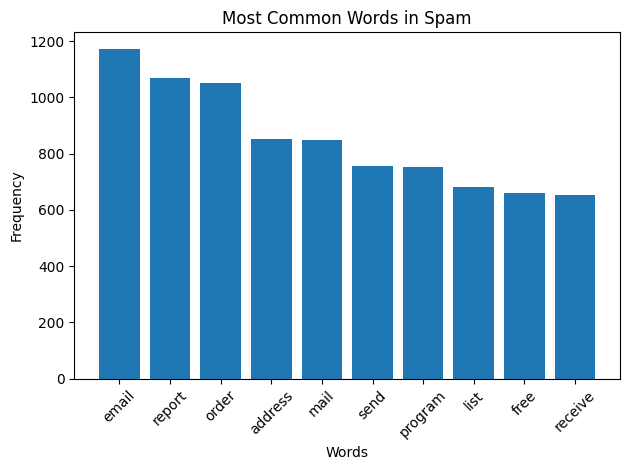

In [34]:
plt.bar(s_words[:10], s_counts[:10])
plt.title('Most Common Words in Spam')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

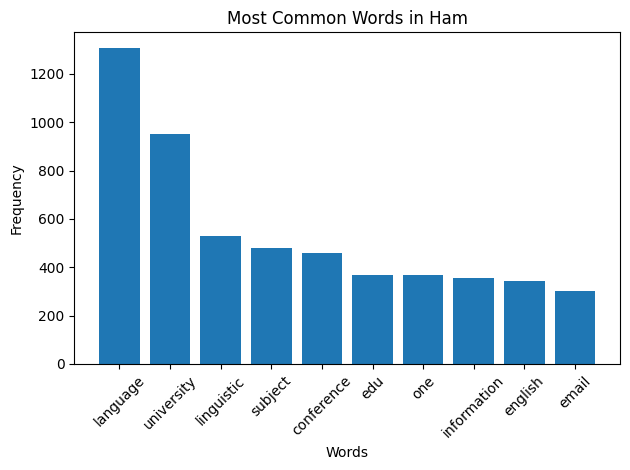

In [35]:
plt.bar(h_words[:10], h_counts[:10])
plt.title('Most Common Words in Ham')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
import string

punctuation_chars = string.punctuation
regex_pat = "[" + re.escape(punctuation_chars) + "]"

train_data["punctuation_freq"] = train_data["text"].apply(
    lambda x: len(re.findall(regex_pat, x))
)

test_data["punctuation_freq"] = test_data["text"].apply(
    lambda x: len(re.findall(regex_pat, x))
)

In [37]:
good_emails = ["gmail", "edu"]

train_data["good_email"] = train_data["text"].apply(
    lambda x: sum(1 for i in good_emails if i in x)
)

test_data["good_email"] = test_data["text"].apply(
    lambda x: sum(1 for i in good_emails if i in x)
)

In [38]:
train_data['msg_len'] = train_data['text'].apply(
    lambda x: len(x)
)

test_data['msg_len'] = test_data['text'].apply(
    lambda x: len(x)
)

In [39]:
numeric_features = ["spam_most_common_freq", "punctuation_freq", 
                    "msg_len", "ham_most_common_freq", "good_email"]
X_train_num = train_data[numeric_features]
X_test_num = test_data[numeric_features]

In [40]:
# scale everything
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [41]:
# checking weights
print(data["is_spam"].value_counts(normalize=True))

is_spam
0    0.556713
1    0.443287
Name: proportion, dtype: float64


Pretty proportional, no need to change anything here.

## Count Vectorize the text

In [42]:
# i think this might work better too sometimes for the multinomial since its expecting frequencies
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

vectorizer = CountVectorizer(stop_words='english', min_df=2)
X_train_vec = vectorizer.fit_transform(train_data["text"])
X_test_vec = vectorizer.transform(test_data["text"])

In [43]:
from scipy.sparse import csr_matrix

X_train_final = hstack([X_train_vec, csr_matrix(X_train_num)])
X_test_final = hstack([X_test_vec, csr_matrix(X_test_num)])

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with

In [44]:
from sklearn.model_selection import cross_val_score, cross_validate

In [45]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold

# define utility function for getting the stat scores of a model
def return_stats(model):
    global X_train_final, X_test_final, y_train, y_test
    
    model.fit(X_train_final, y_train)

    y_test_pred = model.predict(X_test_final)
    accuracy = accuracy_score(y_test, np.round(y_test_pred))
    print("Test Accuracy:", accuracy)

    print(classification_report(y_test, y_test_pred))

    cv = KFold(n_splits=10)
    scores = cross_val_score(model, X_train_final, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print("CV Accuracy", scores.mean(), "\n")

In [64]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
return_stats(log)

Test Accuracy: 0.9942196531791907
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.99      0.99        77

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173

CV Accuracy 0.9898550724637681 



This is really really good. A little too good. 

In [68]:
np.random.seed(42)
shuffled = np.random.permutation(y_train)
log.fit(X_train_final, shuffled)
print("Shuffled accuracy:", accuracy_score(y_test, log.predict(X_test_final)))

Shuffled accuracy: 0.5144508670520231


/opt/tljh/user/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


50%, which is good. This means there's no data leakage. Really weird accuracy. Might not use this model because of the convergence issues.

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

text_only_model = make_pipeline(CountVectorizer(stop_words='english'),
                      MultinomialNB())

text_only_model.fit(X_train_text, y_train)

y_test_pred = text_only_model.predict(X_test_text)
accuracy = accuracy_score(y_test, np.round(y_test_pred))
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9884393063583815


This is really bizarre. Just the base model and count vecotorization training only on the train data gives me a 98???

In [47]:
num_only_model = MultinomialNB()

num_only_model.fit(X_train_num, y_train)

y_test_pred = num_only_model.predict(X_test_num)
accuracy = accuracy_score(y_test, np.round(y_test_pred))
print("Test Accuracy:", accuracy)

Test Accuracy: 0.630057803468208


Without count vectorization, I have an accuracy of 63%. This is a good sign. This means my issue is probably with count vectorization.

In [54]:
np.random.seed(42)
shuffled = np.random.permutation(y_train)
text_only_model.fit(X_train_text, shuffled)
print("Shuffled accuracy:", accuracy_score(y_test, text_only_model.predict(X_test_text)))

Shuffled accuracy: 0.4682080924855491


I genuinely have no idea what's going on. It's getting ~50% accuracy when shuffled, which is as expected, but it just doesn't make sense how I'm getting 98% with just a count vecotirzer

In [55]:
# https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/
mnb = MultinomialNB()
return_stats(mnb)

Test Accuracy: 0.9884393063583815
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.97      0.99        77

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173

CV Accuracy 0.9884057971014494 



I have no idea where I went wrong, but I got a really high accuracy. It's the exact same as the base model though.

In [57]:
vec = text_only_model.named_steps["countvectorizer"]
nb = text_only_model.named_steps["multinomialnb"]

feature_names = vec.get_feature_names_out()

spam_log_probs = nb.feature_log_prob_[1]
ham_log_probs = nb.feature_log_prob_[0]

top_spam = np.argsort(spam_log_probs)[-15:]
top_ham = np.argsort(ham_log_probs)[-15:]

print("Top spam words:", [feature_names[i] for i in top_spam])
print("Top ham words:", [feature_names[i] for i in top_ham])

Top spam words: ['com', 'receive', 'http', 'report', 'subject', 'program', 'send', 'list', 'order', 'email', 'university', 'address', 'mail', 'language', '20']
Top ham words: ['money', 'free', 'receive', 'work', 'information', 'university', 'program', 'subject', 'send', 'address', '20', 'language', 'order', 'report', 'mail']


These top words tend to be really really similar, maybe that's why?

## Conclusion

I have an extremely high accuracy rate, even with test accuracy and cross validation. I splitted my data extremely early on, so I'm not sure why my accuracy is so high.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [69]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'alpha': np.logspace(-3, 1, 50),
    'fit_prior': [True, False]
}

rand_mnb = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_mnb.fit(X_train_final, y_train)
print("Best params:", rand_mnb.best_params_)
print("Best CV Score for random for mnb:", rand_mnb.best_score_)
best_mnb = rand_mnb.best_estimator_

Best params: {'fit_prior': False, 'alpha': np.float64(0.0625055192527397)}
Best CV Score for random for mnb: 0.9885108215666902


In [70]:
import joblib

# dump models
joblib.dump(mnb, './models/base_mnb.pkl')
joblib.dump(best_mnb, './models/best_mnb.pkl')

['./models/best_mnb.pkl']

In [71]:
joblib.dump(vectorizer, "./models/vectorizer.pkl")
joblib.dump(scaler, "./models/scaler.pkl")

feature_params = [s_words, h_words, good_emails]
joblib.dump(feature_params, "./models/feature_params.pkl")

['./models/feature_params.pkl']

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


I first took the data provided and created a dataset with the emails for easy access. Then, I investigated the data and found that the most important distinctions between spam and ham tended to relate to the syntax of the email and who sent it. With this knowledge, I create attributes to mark these distinctions and then used a count vectorizer to vectorize the email text for easier learning. Finally, I put this all into a multinomial naive bayes model, getting a final test and cross validation accuracy of 98%.

Such a high accuracy lead me to believe that the model was either overfitting or there was data leakage. To be safe, I split my data before any feature engineering and monitored my accuracies, although they stayed the same. Additionally, I ran sanity checks to make sure when I was given random spam or ham classifications the model would get 50%, which it did. The only other thing I can think of is the fact that the "good emails" attribute is slightly biased because I looked at some of the data and found that edu was a common link between ham emails. However, when I train only using that kind of numeric data, I get a 63, which isn't enough to sway my entire model. I believe the issue is with my count vectorizer. I'm not entirely sure what other types of tests I can run to fix this would be.

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [75]:
# import libraries
import pandas as pd
import numpy as np
import joblib
from scipy.sparse import hstack, csr_matrix


def infrence(text):

    # load everything in
    model = joblib.load("./models/best_mnb.pkl")
    vectorizer = joblib.load("./models/vectorizer.pkl")
    scaler = joblib.load("./models/scaler.pkl")
    feature_params = joblib.load("./models/feature_params.pkl")
    
    s_words = feature_params[0]
    h_words = feature_params[1]
    good_emails = feature_params[2]

    # clean and tokenize the text
    cleaned = re.sub(r'[^A-Za-z\s]', '', text).lower()
    tokens = [word for word in cleaned.split() if word not in stopwords and len(word) > 2]
    token_counter = collections.Counter(tokens)

    # freq of most common words
    spam_freq = np.sum([token_counter[word.lower()] for word in s_words])
    ham_freq = np.sum([token_counter[word.lower()] for word in h_words])

    # amt of punctuation
    punctuation_chars = string.punctuation
    regex_pat = "[" + re.escape(punctuation_chars) + "]"
    punct_freq = len(re.findall(regex_pat, text))

    # good email domain
    good_email_count = sum(1 for x in good_emails if x in text.lower())

    # msg length
    msg_len = len(text)

    # create df of numeric
    numeric_features = pd.DataFrame([[spam_freq, punct_freq, msg_len, ham_freq, good_email_count]],
                                columns=['spam_most_common_freq','punctuation_freq','msg_len','ham_most_common_freq','good_email'])
    numeric_features_scaled = scaler.transform(numeric_features)

    # vectorize words
    text_features = vectorizer.transform([text])
    X = hstack([text_features, csr_matrix(numeric_features_scaled)])
    
    # predcit!
    prediction = model.predict(X)
        
    return prediction[0]

In [76]:
test1 = '''Subject: stock market information

sender : trinity venture , inc . address : 1911 westmead # 2710 , houston , tx 7707 call fax toll free : 877-393 - 7237 hours : 9 5 pm cst hi , receive e-mail address someone interest stock market information . e-mail informational purpose . offer sell solicit security . wish receive type information , please click " reply " put " remove " subject . permanently remove address our database . news help due diligence abrg , www . yahoo . com click " stock quote " . put abrg symbol lookup area click " quote " . happy invest ! - dean casia president trinity venture , inc . news release ambra resources group inc . # 610-800 west pender street vancouver , b . c . canada v6c 2v6 symbol abrg ( otc : bb ) acquisition venture oil & gas , inc . ambra resources group inc . adds projects ambra vancouver , british columbium - 4 , 1999 ambra resource group inc . ( otc bb : abrg ) , acquire 50 % ownership venture oil & gas , inc . ambra become 50 % owner property project venture interest . consideration ambra 's purchase 50 % capital stock venture inc . one million shares ambra common stock . part acquisition , venture assign ambra , 50 % interest bastian bay field prospect , state lease " 9800 " . 1 , plaquemine parish , louisiana . additional project assign ambra venture ambra shall right request assignment 50 % interest retain venture various project . primary business venture inc . acquire oil gas property re-mediation re-completion work result enhance recovery rate bring back commercial production . current economic condition petroleum industry facilitate acquisition property larger produce company declare surplus property . ambra venture inc . favorable position able acquire property while inventory offering high level . venture currently negotiate acquisition multiple oil gas project texa , louisiana oklahoma , party anticipate add significantly ambra 's resource base productive project . board director john m . hickey , president contact : ambra resource group inc . investor relation : 800-698 - 3377 604-669 - 2723 web site : http : / / www . ambraresource . com release informational purpose . offer sell solicit security product kind . release include information constitute forward-look statement pursuant safe harbor provision private security litigation reform act 1995 . forward-look statement involve risk uncertainty cause actual result differ materially future result encompass within forward-look statement . material provide ambra resource group inc . " " basis . ambra resource group inc . expressly disclaim warranty , express imply , include without limitation , warranty merchantability fitness particular purpose , respect service material product . event shall ambra resource group inc . liable direct , indirect , incidental , punitive consequential damages kind whatsoever respect service , material product . trinity venture , inc . receive fee $ 5 , 0 distribute document . permanently remove e-mail address our file call fax us toll free 877-393 - 7237 ; click " reply " put " remove " subject .
'''
pred = infrence(test1)
print("spam" if pred == 1 else "ham")

spam


In [77]:
test2 = '''Subject: postdoc position groningen , netherland

job position : postdoc dept . social pharmacy pharmacoepidemiology , groningen institute drug study , faculty mathematic natural science , netherland . description work group social pharmacy pharmacoepidemiology perform fundamental apply research epidemiological medical literature database order determine effectiveness / side-effect profile drug . post-doc ask participate program develop computer text analysis pattern recognition technique extraction ( side ) effect profile drug pharmaceutical medical electronic literature database : ( 1 ) source information lead innovative drug research ; ( 2 ) determine benefit-risk profile drug . phd - student assign program . requirement computer linguist computer scientist , complete phd - project expertise corpus linguistics , mathematical linguistics intelligent information retrieval ; interest pharmaceutical science innovative drug research ; expertise datum mine pattern recognition method desire . remark salary basis ministry guideline minimum dfl . 3844 , - maximum dfl . f . 7 . 125 , - ( schaal 10 / 11 rwoo ) bruto pro month , dependent education experience . work group social pharmacy pharmacoepidemiology part dutch school ' groningen - utrecht institute drug exploration ' ( guide ) , acknowledge royal dutch academy science . appointment two . information project : prof . dr . r . vo , email : r . vo @ farm . rug . nl ; tel . + 31 . 50 . 3633331 / 3633272 ; fax . + 31 . 50 . 3633311 . reaction . s . . p . , preferably before july 1st , 1997 . - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - marc weeber http : / / www . farm . rug . nl / marc / home . html groningen university centre pharmacy marc @ farm . rug . nl social pharmacy pharmacoepidemiology tel : + 31 50 3637571 _ _ _ . deusinglaan 2 fax : + 31 50 3633311 | 9713 aw groningen , netherland - - - - - - - - - - - - - - - - - - - - - 0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
'''
pred = infrence(test2)
print("spam" if pred == 1 else "ham")

ham
